# Loading the data

In [2]:
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns

data_dir='./dataset/'

In [3]:
df = pd.read_csv(data_dir+'df_processed.csv')
df.drop(['id','comment_text','comment_lower','has_apostrophe','has_new_line'], axis=1, inplace=True)
df['negative_comments'] = df['label_sum'].apply(lambda x:int(x>0))
df[5:8]

,toxic,severe_toxic,obscene,threat,insult,identity_hate,label_sum,com_processed,negative_comments
5,0,0,0,0,0,0,0,congratulations well use tools well talk,0
6,1,1,1,0,1,0,4,cocksucker piss around work,1
7,0,0,0,0,0,0,0,vandalism matt shirvington article reverted pl...,0


In [4]:
target_columns = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']

In [5]:
from sklearn.model_selection import train_test_split
from skmultilearn.model_selection import iterative_train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

def prepare_TFIDF(df, col, binary=False):
    df_train, df_test = train_test_split(df, test_size=0.2, random_state = 8848)
    
    vectorizer = TfidfVectorizer(use_idf=True, max_df=0.95)
    vectorizer.fit_transform(df_train[col].values)
    
    X_train = vectorizer.transform(df_train[col].values)
    X_test  = vectorizer.transform(df_test[col].values)
    
    if 'binary':
        y_train = df_train['negative_comments'].values
        y_test  = df_test['negative_comments'].values
    else:
        y_train = df_train[target_columns].values
        y_test  = df_test[target_columns].values

    return X_train, X_test, y_train, y_test, vectorizer

X_train_tf, X_test_tf, y_train_tf, y_test_tf, vectorizer= prepare_TFIDF(df, "com_processed")



In [6]:
print("X_train Shape: ", X_train_tf.toarray().shape)
print("y_train Shape: ", y_train_tf.shape)

X_train Shape:  (127608, 147278)
y_train Shape:  (127608,)


In [7]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.multioutput import MultiOutputClassifier

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import average_precision_score, roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix


In [8]:
def print_evaluation_scores(actual, pred, label):
    acc        = 100*accuracy_score(actual, pred)
    f1_micro   = 100*f1_score(actual, pred)#, average='binary')
    avg_prec_micro = 100*average_precision_score(actual, pred)#, average='')
    roc_auc    = 100*roc_auc_score(actual, pred)
    
    print (label)
    print ("\nAccuracy \t= %1.2f \nF1_micro\t= %1.2f" %(acc, f1_micro))
    print ("Avg Prec micro\t= %1.2f \nROC_AUC score\t= %1.2f" % ( avg_prec_micro, roc_auc))

In [29]:
def train_multioutput(model, X_train, y_train, X_test, y_test):
    model_multi=MultiOutputClassifier(model)
    model_multi.fit(X_train, y_train)
    pred = model_multi.predict(X_test)

    #mcm = multilabel_confusion_matrix(y_test, pred)
    fig, axL = plt.subplots(2,3, figsize=(15,10))
    for i in range(6):
        conf_matrix = confusion_matrix(y_test[:,i], pred[:,i])
        ax=axL[i//3, i%3]
        ax.set_title(target_columns[i], fontsize=14)
        sns.heatmap(conf_matrix, ax=ax, cmap='viridis', annot=True, cbar=False)
        print_evaluation_scores(y_test[:,i], pred[:,i], label=target_columns[i])

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

toxic

Accuracy 	= 95.69 
F1_micro	= 72.71
Avg Prec micro	= 59.28 
ROC_AUC score	= 79.67
severe_toxic

Accuracy 	= 99.03 
F1_micro	= 33.55
Avg Prec micro	= 13.62 
ROC_AUC score	= 62.27
obscene

Accuracy 	= 97.87 
F1_micro	= 76.21
Avg Prec micro	= 61.86 
ROC_AUC score	= 82.19
threat

Accuracy 	= 99.73 
F1_micro	= 15.69
Avg Prec micro	= 5.79 
ROC_AUC score	= 54.49
insult

Accuracy 	= 97.12 
F1_micro	= 64.12
Avg Prec micro	= 45.81 
ROC_AUC score	= 75.76
identity_hate

Accuracy 	= 99.14 
F1_micro	= 23.82
Avg Prec micro	= 10.29 
ROC_AUC score	= 57.25


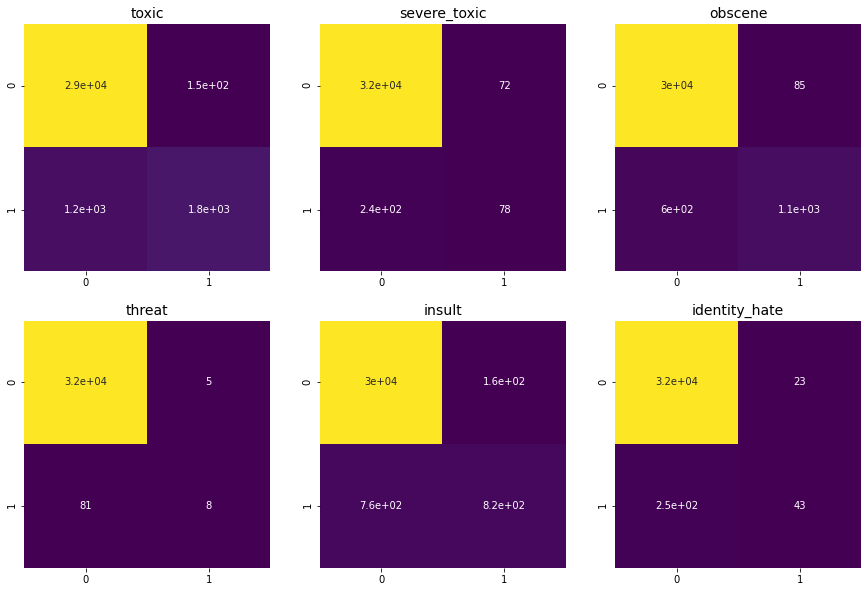

In [30]:
model = LogisticRegression(penalty='l2', C=1.0,max_iter=500)
train_multioutput(model, X_train_tf, y_train_tf, X_test_tf, y_test_tf)

toxic

Accuracy 	= 95.69 
F1_micro	= 95.69
Avg Prec micro	= 59.28 
ROC_AUC score	= 79.67
severe_toxic

Accuracy 	= 99.03 
F1_micro	= 99.03
Avg Prec micro	= 13.62 
ROC_AUC score	= 62.27
obscene

Accuracy 	= 97.87 
F1_micro	= 97.87
Avg Prec micro	= 61.86 
ROC_AUC score	= 82.19
threat

Accuracy 	= 99.73 
F1_micro	= 99.73
Avg Prec micro	= 5.79 
ROC_AUC score	= 54.49
insult

Accuracy 	= 97.12 
F1_micro	= 97.12
Avg Prec micro	= 45.81 
ROC_AUC score	= 75.76
identity_hate

Accuracy 	= 99.14 
F1_micro	= 99.14
Avg Prec micro	= 10.29 
ROC_AUC score	= 57.25


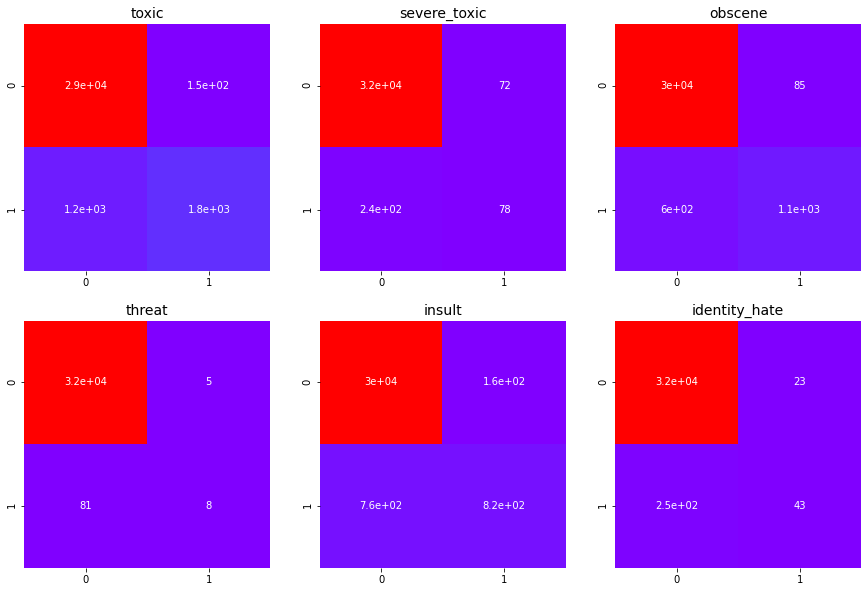

In [14]:
model = LogisticRegression(penalty='l2', C=1.0,max_iter=500)
train_multioutput(model, X_train_tf, y_train_tf, X_test_tf, y_test_tf)

In [27]:
cm=[[3.2e04, 72], [2.4e02, 78]]
prec = 78/(78+72)
rec = 78/(78+240)
f1 = 2* prec*rec/(prec+rec)
print (f1)


0.3333333333333333


In [ ]:
from sklearn.svm import SVC
model = SVC()
train_multioutput(model, X_train_tf, y_train_tf, X_test_tf, y_test_tf)

toxic

Accuracy 	= 94.36 
F1_micro	= 94.36
Avg Prec micro	= 47.34 
ROC_AUC score	= 74.49
severe_toxic

Accuracy 	= 98.94 
F1_micro	= 98.94
Avg Prec micro	= 10.71 
ROC_AUC score	= 61.43
obscene

Accuracy 	= 97.77 
F1_micro	= 97.77
Avg Prec micro	= 61.01 
ROC_AUC score	= 83.99
threat

Accuracy 	= 99.71 
F1_micro	= 99.71
Avg Prec micro	= 10.36 
ROC_AUC score	= 60.64
insult

Accuracy 	= 96.67 
F1_micro	= 96.67
Avg Prec micro	= 41.68 
ROC_AUC score	= 77.33
identity_hate

Accuracy 	= 99.11 
F1_micro	= 99.11
Avg Prec micro	= 13.65 
ROC_AUC score	= 61.94


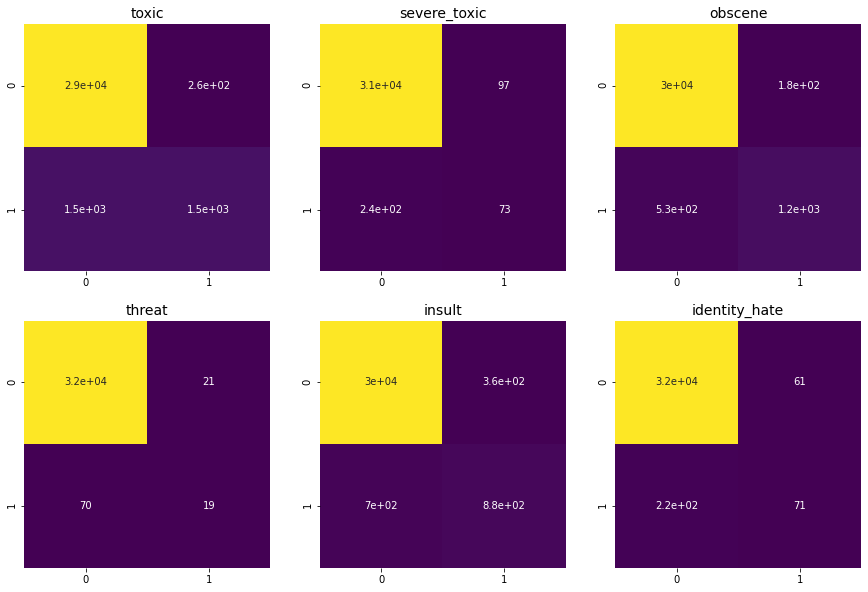

In [19]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 8848, max_depth = 20)
train_multioutput(model, X_train_tf, y_train_tf, X_test_tf, y_test_tf)

toxic

Accuracy 	= 90.41 
F1_micro	= 90.41
Avg Prec micro	= 9.59 
ROC_AUC score	= 50.00
severe_toxic

Accuracy 	= 99.01 
F1_micro	= 99.01
Avg Prec micro	= 0.99 
ROC_AUC score	= 50.00
obscene

Accuracy 	= 94.71 
F1_micro	= 94.71
Avg Prec micro	= 5.29 
ROC_AUC score	= 50.00
threat

Accuracy 	= 99.72 
F1_micro	= 99.72
Avg Prec micro	= 0.28 
ROC_AUC score	= 50.00
insult

Accuracy 	= 95.06 
F1_micro	= 95.06
Avg Prec micro	= 4.94 
ROC_AUC score	= 50.00
identity_hate

Accuracy 	= 99.08 
F1_micro	= 99.08
Avg Prec micro	= 0.92 
ROC_AUC score	= 50.00


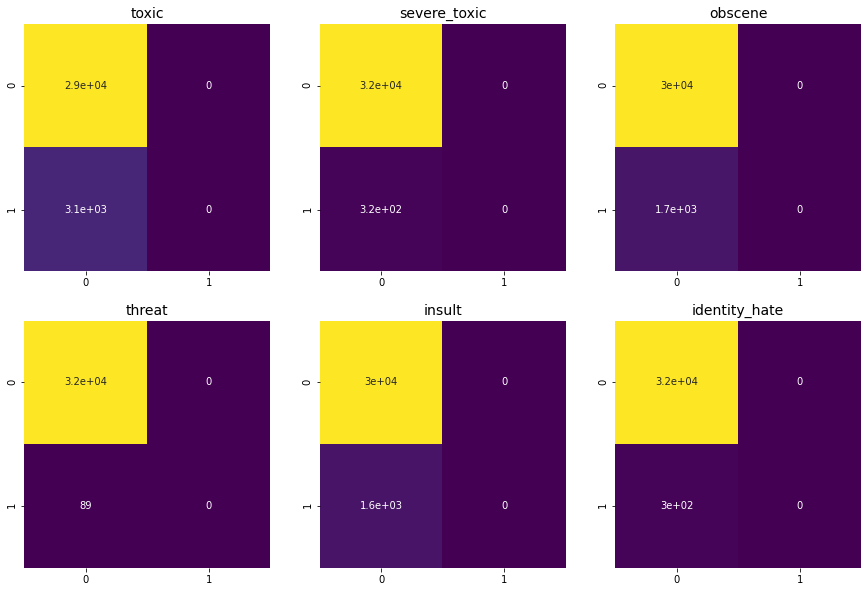

In [21]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500, max_depth = 20)
train_multioutput(model, X_train_tf, y_train_tf, X_test_tf, y_test_tf)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

def prepare_BOW(df, col):
    df_train, df_test = train_test_split(df, test_size=0.2, random_state = 8848)
    
    vectorizer = CountVectorizer()
    vectorizer.fit_transform(df_train[col].values)
    
    X_train = vectorizer.transform(df_train[col].values)
    X_test  = vectorizer.transform(df_test[col].values)
    
    y_train = df_train[target_columns].values
    y_test  = df_test[target_columns].values

    return X_train, X_test, y_train, y_test, vectorizer

X_train_bow, X_test_bow, y_train_bow, y_test_bow, count_vectorizer= prepare_BOW(df, "com_processed")


In [ ]:
#model_LR_bow, y_pred_labs_bow, y_pred_scores_bow =  LR_model(X_train_bow,
#                                                             y_train_bow,
#                                                             X_test_bow)

LR on the BOW data was too much to train. It failed. even after setting the max_iter=1000 the model didn't run.

So Use PCA to convert the data to a smaller dimensional matrix.

In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.decomposition import PCA


# pca_pipe = Pipeline([('scale',StandardScaler(with_mean=False)),
#                          ('pca',PCA())])

# pca_pipe.fit(X_train_tf)

# #pca = PCA(n_components = 10)
# #pca.fit(X_train_tf)

# from sklearn.decomposition import PCA
# pca = PCA(n_components = n_comp)
# pca.fit(train_tfidf)
# X_train = pca.transform(train_tfidf)
# X_test = pca.transform(test_tfidf)

# pca = PCA(n_components=200)

# pca.fit(X[X.columns[1:]])

# plt.figure(figsize=(10,8))

# plt.plot(range(1,201),
#         np.cumsum(pca.explained_variance_ratio_))

# plt.xlabel("PCA Component", fontsize=16)
# plt.ylabel("Cumulative Variance Explained", fontsize=16)

# plt.show()

## Binary Model

In [13]:

X_train_bin, X_test_bin, y_train_bin, y_test_bin, vectorizer= prepare_TFIDF(df, "com_processed", binary=True)


In [17]:
import pickle

with open("vectorizer.pkl", "wb") as fo:
    pickle.dump(vectorizer, fo)

In [10]:
y_train_bin.shape

(127608,)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.multioutput import MultiOutputClassifier

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import average_precision_score, roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix


In [12]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import precision_recall_fscore_support

models = [
    #["LR",LogisticRegression(max_iter=500, class_weight='balance')],
    ["DT",DecisionTreeClassifier(class_weight='balanced')]]

for i, (model_name, model) in enumerate(models):
    model.fit(X_train_bin, y_train_bin)
    y_pred = model.predict(X_test_bin)
    #acc = accuracy_score(y_test_bin, y_pred)
    #f1  = f1_score(y_test_bin, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_test_bin, y_pred)
    print (model_name, prec, rec, f1)


    
#model = DecisionTreeClassifier(random_state = 8848, max_depth = 20)
#train_multioutput(model, X_train_tf, y_train_tf, X_test_tf, y_test_tf)

DT [0.96758186 0.54458673] [0.931773   0.72325294] [0.94933987 0.62133085]


In [18]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import precision_recall_fscore_support

models = [["LR",LogisticRegression(max_iter=500, class_weight='balance')]]

for i, (model_name, model) in enumerate(models):
    model.fit(X_train_bin, y_train_bin)
    y_pred = model.predict(X_test_bin)
    prec, rec, f1, _ = precision_recall_fscore_support(y_test_bin, y_pred)
    print (model_name, prec, rec, f1)


    
#model = DecisionTreeClassifier(random_state = 8848, max_depth = 20)
#train_multioutput(model, X_train_tf, y_train_tf, X_test_tf, y_test_tf)

LR [0.9569492  0.92860543] [0.99476787 0.60327767] [0.97549212 0.73139644]


In [19]:
import pickle

with open("model_LR.pkl", "wb") as fo:
    pickle.dump(model, fo)